# Artificial Neural Networks

Steps:
1. Load data
    - MNIST dataset
        - Black and white, handwritten digits
        - Included in `tf.keras.datasets`
        - 28 x 28 images with values ranging from 0 to 255
    - 10 digits (0 to 9)
    - Already included in Tensorflow
2. Build model
    - Sequential dense layers ending with multiclass logistic regression
3. Train the model
    - Same as before!
4. Evaluate the model
    - Also the same (these are "model-agnostic")
5. Make predictions
    - Being able to **see** what the neural network is getting wrong will be insightfull

Model arquitecture:
```
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
```
- **Flatten**: To go from (28 x 28 x N) to (784 x N)
- **Dense**: 128 is a good # of neurons, found by trial and error. Relu is an activation function that works, trial and error
- **Dropout**: 20% of random neurons per layer are ignored during training(type of regularization), so that no neuron is TOO important
- **Dense**: 10 output neurons because there are 10 categories, 'softmax' because it's a multiple classification problem

Train model:
```
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
```
- **Sparse Categorical Crossentropy**:
    - Good for multiple classification problem when only **one output** is correct
    - It's sparse because the one-hot encoding is all zeros except for correct output
    - We only use the largest probability to calculate the loss, reducing computational time by a factor of the total number of categories
    
Evaluating the model and making predictions (same as all models):
```
model.evaluate(X, y)
model.predict(X)
```

## ANN for Image Classification

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Import and transform data

In [23]:
# load data
mnist = tf.keras.datasets.mnist
(X_train, y_train),  (X_test, y_test) = mnist.load_data()

In [24]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [25]:
# transform from (0, 255) to (0, 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [26]:
# Image size (60000, 28, 28)
N, image_x, image_y = X_train.shape

### Model

In [39]:
# Build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_x, image_y)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')           # 10 neurons, one per digit
])

In [40]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
# fit data
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2976 - accuracy: 0.9143 - val_loss: 0.1368 - val_accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1448 - accuracy: 0.9575 - val_loss: 0.0979 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1074 - accuracy: 0.9674 - val_loss: 0.0845 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0876 - accuracy: 0.9733 - val_loss: 0.0796 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0744 - accuracy: 0.9767 - val_loss: 0.0729 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.0712 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0587 - accuracy: 0.9815 - val_loss: 0.0643 - val_accuracy:

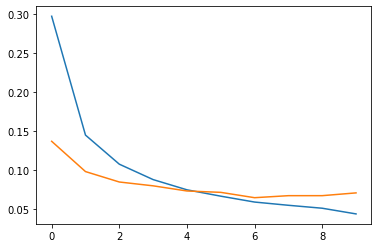

In [42]:
# plot loss per epoch
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('Loss per epoch')
plt.legend()

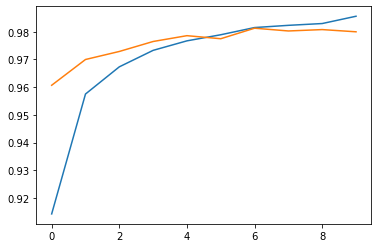

In [44]:
# plot accuracy per epoch
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy per epoch')
plt.legend()

### Analyze model's performance

In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 950us/step - loss: 0.0705 - accuracy: 0.9800


[0.07048981636762619, 0.9800000190734863]

In [48]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [49]:
# create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[ 970    1    1    0    1    3    2    1    1    0]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   3    0 1011    2    1    0    2    5    7    1]
 [   1    0    3  989    0    8    0    3    4    2]
 [   1    1    2    0  968    0    4    1    0    5]
 [   2    0    0    8    1  874    4    1    2    0]
 [   6    3    0    1    6    3  938    1    0    0]
 [   1    6   10    0    1    0    0 1003    3    4]
 [   4    0    2    4    5    6    4    2  945    2]
 [   1    3    0    3   11    7    1    6    0  977]]


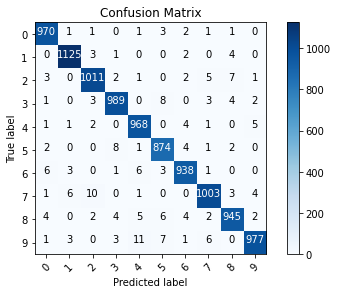

In [52]:
# Calculate confusion matrix
y_hat = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_hat)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 4, Predicted: 0')

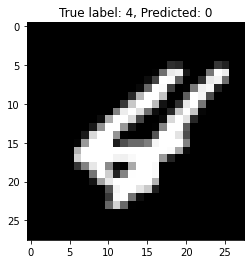

In [90]:
# show misclassified example
misclassified_idx = np.where(y_hat != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'True label: {y_test[i]}, Predicted: {y_hat[i]}')

## ANN for Regression

In [91]:
from mpl_toolkits.mplot3d import Axes3D

### Create artificial dataset

In [95]:
# number of data points
N = 1000

# uniformly distributed X=(x_1, x_2) data from [-3,-3] to [3,3]
X = np.random.random((N, 2)) * 6 - 3

# example of target function: y = cos(2 x_1) + cos(3 x_2)
y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

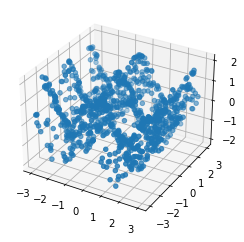

In [97]:
# plot it (we can do it on a separate python script in order to play with the plot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

### Create Neural Network

In [98]:
# build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [99]:
# compile model with custom optimizer (check documentation)
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')

In [100]:
# fit model
r = model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 709us/step - loss: 0.9332
Epoch 2/100
32/32 [==============================] - 0s 716us/step - loss: 0.8814
Epoch 3/100
32/32 [==============================] - 0s 750us/step - loss: 0.8724
Epoch 4/100
32/32 [==============================] - 0s 754us/step - loss: 0.8599
Epoch 5/100
32/32 [==============================] - 0s 693us/step - loss: 0.8507
Epoch 6/100
32/32 [==============================] - 0s 755us/step - loss: 0.7919
Epoch 7/100
32/32 [==============================] - 0s 695us/step - loss: 0.7185
Epoch 8/100
32/32 [==============================] - 0s 772us/step - loss: 0.7514
Epoch 9/100
32/32 [==============================] - 0s 633us/step - loss: 0.7013
Epoch 10/100
32/32 [==============================] - 0s 710us/step - loss: 0.6045
Epoch 11/100
32/32 [==============================] - 0s 670us/step - loss: 0.5933
Epoch 12/100
32/32 [==============================] - 0s 617us/step - loss: 0.5651
Epoch 13/100


32/32 [==============================] - 0s 604us/step - loss: 0.0142
Epoch 100/100
32/32 [==============================] - 0s 672us/step - loss: 0.0119


Text(0.5, 1.0, 'Training loss')

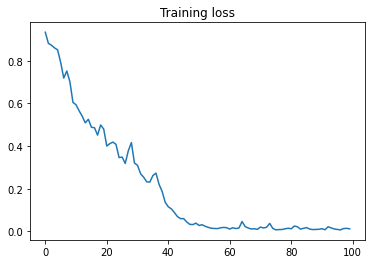

In [103]:
# plot training
plt.plot(r.history['loss'])
plt.title('Training loss')

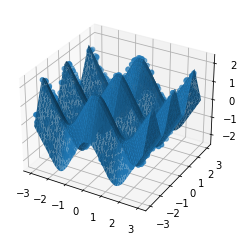

In [114]:
# plot prediction surface (we can do it on a separate python script in order to play with the plot)
points = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(points, points)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_grid).flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.plot_trisurf(X_grid[:,0], X_grid[:,1], y_hat, linewidth=0.2, antialiased=True)
plt.show()